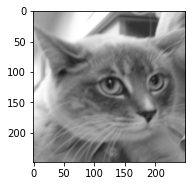

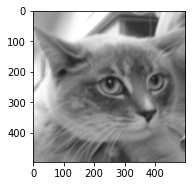

In [11]:
#高分辨率大尺寸图像向上构建金字塔 cv2.pyrDown()

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('1.png')
lower_reso = cv2.pyrDown(img)
plt.subplot(121)
plt.imshow(lower_reso)
plt.show()
higher_reso2 = cv2.pyrUp(lower_reso)
plt.subplot(122)
plt.imshow(higher_reso2)
plt.show()

(16, 15, 3) (16, 15, 3)
(32, 30, 3) (32, 30, 3)
(63, 59, 3) (63, 59, 3)
(126, 118, 3) (126, 118, 3)
(252, 235, 3) (252, 235, 3)
(15, 22, 3) (15, 22, 3)
(30, 43, 3) (30, 43, 3)
(60, 85, 3) (60, 85, 3)
(120, 169, 3) (120, 169, 3)
(240, 338, 3) (240, 338, 3)
(8, 8, 3) (8, 8, 3)
(16, 15, 3) (16, 15, 3)
(32, 30, 3) (32, 30, 3)
(63, 59, 3) (63, 59, 3)
(126, 118, 3) (126, 118, 3)
(252, 235, 3) (252, 235, 3)
(16, 15, 3) (16, 15, 3)
(32, 30, 3) (32, 30, 3)
(63, 59, 3) (63, 59, 3)
(126, 118, 3) (126, 118, 3)
(252, 235, 3) (252, 235, 3)


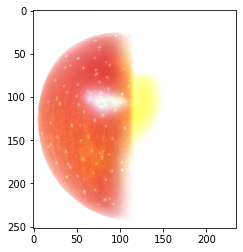

In [6]:
#图像金字塔   将苹果和橘子融合  
import cv2
import matplotlib.pyplot as plt
import numpy as np
a = cv2.imread('apple.jpg')
b = cv2.imread('orange.jpg')
# print(a.shape,b.shape)
g = a.copy()
gpa = [g]
for i in range(6):
    g = cv2.pyrDown(g)
    gpa.append(g)
g = b.copy()
gpb = [g]
for i in range(6):
    g = cv2.pyrDown(g)
    gpb.append(g)

lpa = [gpa[5]]
for i in range(5,0,-1):
    ge = cv2.pyrUp(gpa[i])
    h,w,_ = gpa[i-1].shape
    ge = cv2.resize(ge, (w,h), interpolation=cv2.INTER_AREA)
    print(gpa[i-1].shape,ge.shape)
    l = cv2.subtract(gpa[i-1],ge)
    lpa.append(l)
lpb = [gpb[5]]
for i in range(5,0,-1):
    ge = cv2.pyrUp(gpb[i])
    h,w,_ = gpb[i-1].shape
    ge = cv2.resize(ge, (w,h), interpolation=cv2.INTER_AREA)
    print(gpb[i-1].shape,ge.shape)
    l = cv2.subtract(gpb[i-1],ge)
    lpb.append(ge)

LS = []
for la,lb in zip(lpa,lpb):
    rows,cols,dpt = la.shape
    h,w,_ = la.shape
    lb = cv2.resize(lb,(w,h),cv2.INTER_AREA)
    print(la.shape,lb.shape)
    ls = np.hstack((la[:,0:int(cols/2)],lb[:,int(cols/2):]))
    LS.append(ls)
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    h,w,_ = LS[i].shape
    ls_ = cv2.resize(ls_,(w,h),cv2.INTER_AREA)
    print(ls_.shape,LS[i].shape)

    ls_ = cv2.add(ls_,LS[i])
ls_ = cv2.cvtColor(ls_,cv2.COLOR_BGR2RGB)
# real = np.hstack((a[:,:int(cols/2)],b[:,int(cols/2):]))
plt.imshow(ls_)
# cv2.imshow('direct_jpg',real)
plt.show()

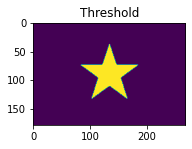

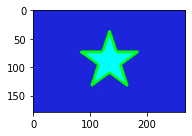

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('flag.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
plt.subplot(1,2,1)
plt.imshow(thresh)
plt.title('Threshold')
plt.show()
#轮廓检索模式，轮廓近似方法
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img,contours,-1,(0,255,0),3)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

重心的x坐标为： 133 重心的y坐标为： 89
(161, 1, 2)


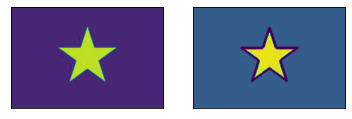

(179, 268)

In [1]:
#重心
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
img = cv2.imread('flag.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)  #图像转化为灰度图
img_1 = img.copy()
plt.subplot(121),plt.imshow(img)
plt.xticks([]),plt.yticks([])
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print('重心的x坐标为：',int(M['m10']/M['m00']),'重心的y坐标为：',int(M['m01']/M['m00']))

img_ = cv2.drawContours(img,contours,-1,(0,255,0),3)
print(np.array(contours[0]).shape)
plt.subplot(122),plt.imshow(img_)
plt.xticks([]),plt.yticks([])
plt.show()
img.shape

In [2]:
#面积,周长
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
print(area,perimeter)

3019.0 393.50461208820343


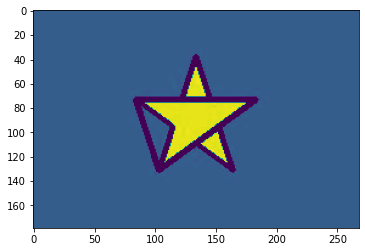

In [3]:
#轮廓近似
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
img_ = cv2.drawContours(img,[approx],-1,(0,255,0),3)
plt.imshow(img_)


[array([[[ 84.00001 ,  37.999992]],

       [[183.      ,  37.999992]],

       [[183.      , 130.99997 ]],

       [[ 84.      , 130.99997 ]]], dtype=float32)]


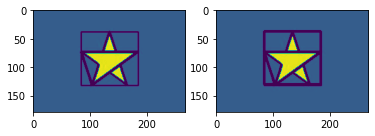

In [4]:
#边界矩形
x,y,w,h = cv2.boundingRect(cnt)
img_ = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.subplot(121)
plt.imshow(img_)


#旋转矩形
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
img_ = cv2.drawContours(img,[np.expand_dims(box,axis=1).astype(int)],-1,(0,255,0),3)
print([np.expand_dims(box,axis=1)])
plt.subplot(122)
plt.imshow(img_)
plt.show()

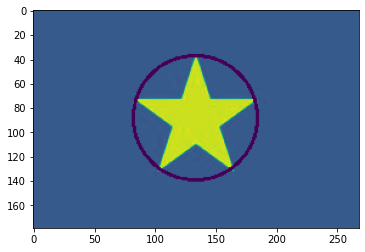

In [5]:
#最小外接圆
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img_2 = img_1.copy()
img_ = cv2.circle(img_1,center,radius,(0,255,0),2)
plt.imshow(img_)
plt.show()

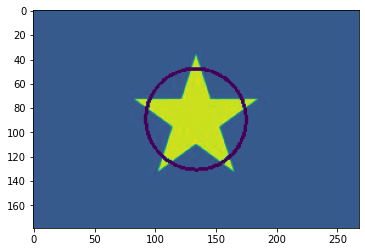

In [6]:
#椭圆检测
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img_2,ellipse,(0,255,0),2)
plt.imshow(img)
plt.show()

In [7]:
#凸包
hull = cv2.convexHull(cnt,returnPoints=True)
k = cv2.isContourConvex(cnt)   #判断曲线是不否是凸包

In [8]:
#凸缺陷
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('flag.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contour,hierarcy = cv2.findContours(thresh,1,2)
cnt = contour[0]
hull = cv2.convexHull(cnt,returnPoints=False)
defects = cv2.convexityDefects(cnt,hull)
print(np.array(cnt).shape)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s,0])
    end = tuple(cnt[e,0])
    far = tuple(cnt[f,0])
    cv2.line(img,start,end,(0,255,0),2)    #2是线的粗细
    cv2.circle(img,far,3,(0,0,255),-1)    #3是圆的大小，-1是代表实心圆 
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(162, 1, 2)


In [10]:
dist = cv2.pointPolygonTest(cnt,(150,100),True)   #轮廓的外部则返回-，轮廓上则0，轮廓内则1
dist

4.0

In [17]:
#图像的形式匹配
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('flag.jpg',0)
ret,thresh1 = cv2.threshold(img1,127,255,0)
print(ret)
contours,hierarcy = cv2.findContours(thresh1,2,1)
cnt1 = contours[0]

img2 = cv2.imread('flag_1.jpg',0)
ret,thresh2 = cv2.threshold(img2,127,255,0)
contours,hierarcy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print('匹配度：',ret)   #
print(img1.shape,img2.shape)

127.0
匹配度： 0.0005522019511616794
(179, 268) (358, 536)


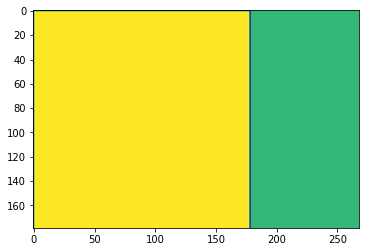

In [55]:
#练习：根据图像上的点到轮廓的距离来上色
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('flag.jpg',0) 
ret,thresh = cv2.threshold(img,127,255,1)   #1是方法参数  
contours,hierarcy = cv2.findContours(thresh,2,1)
cnt = contours[0]
h,w = img.shape

def draw(dist):
    if dist<-50:
        return 255
    elif dist<0:
        return 100
    elif dist==0:
        return 0
    elif dist>0:
        return 150

for i in range(h):
    for j in range(w):
        dist = cv2.pointPolygonTest(cnt,(i,j),False)
        img[i,j] = draw(dist)
plt.imshow(img)
plt.show()